In [5]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
n_fndel = 1
fndel = []
while n_fndel < 122:
    fndel.append('['+'fn '+ str(n_fndel)+']')
    n_fndel += 1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_num = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

list_of_dates = []
month = 1
year = 1979
day = 1
while year < 2020:
    while month < 13:
        while day < 32:
            if day < 10 and month < 10:
                date = '0' + str(day)+'0' +str(month)+str(year)
                list_of_dates.append(date)
                day += 1
            elif month < 10:
                date = str(day)+'0'+ str(month)+str(year)
                list_of_dates.append(date)
                day += 1
            elif day < 10:
                date = '0' + str(day)+str(month)+str(year)
                list_of_dates.append(date)
                day += 1
            else:
                date = str(day)+str(month)+str(year)
                list_of_dates.append(date)
                day += 1
        if day == 32:
            day = 1
            month += 1
    if month == 13:
        year += 1
        month = 1

In [7]:
# acquiring the list of all question time panellists since 1979
myurl = 'https://en.wikipedia.org/wiki/List_of_Question_Time_episodes'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')

info = pagesoup.findAll('table', 'wikitable', 'td')

filename = 'qtpanel.csv'
f = open(filename, 'w')
headers = 'date,name\n'
f.write(headers)

10

In [8]:
year = 3
while year < 44:
    yearinfo = info[year].findAll('tr')
    episode = 1
    while episode < len(yearinfo):
        show = yearinfo[episode]
        txt = show.get_text()
        n_fndel = 0
        while n_fndel < 121:
            if fndel[n_fndel] in txt:
                txt = txt.replace(fndel[n_fndel], '')
            n_fndel += 1
        i_dates1 = 0
        if '(General Election Special)' in txt:
            txt = txt.replace('(General Election Special)', '')
        if 'Post General Election Special' in txt:
            txt = txt.replace('Post General Election Special', '')
        if "Leaders' General Election Special" in txt:
            txt = txt.replace("Leaders' General Election Special", '')
        if '.' in txt:
            txt = txt.replace('.', '')
        if 'anniversary' in txt:
            txt = txt.replace('anniversary', '')
        while i_dates1 < 5:
            ind_n = txt.find('\n')
            txt = txt[ind_n+1:]
            i_dates1+=1
        txt_dates = txt
        i_names1 = 0
        while i_names1 < 4:
            ind_n = txt.find('\n')
            txt = txt[ind_n+1:]
            i_names1 += 1
        txt_names = txt
        txt_dates = txt_dates.replace(' ', '')
        i_dates2 = 0
        while i_dates2 < 12:
            if months[i_dates2] in txt_dates:
                txt_dates = txt_dates.replace(months[i_dates2],months_num[i_dates2])
            i_dates2 += 1
        ind_dates = txt_dates.find('\n')
        if ind_dates < 8:
            txt_dates = '0' + txt_dates
        elif ind_dates >=8:
            txt_dates = txt_dates
        for dates in list_of_dates:
            if dates in txt_dates:
                txt_dates = txt_dates[:len(dates)]
        txt_names = txt_names.replace('\n', '')
        if ' and' in txt_names:
            txt_names = txt_names.replace(' and', ',')
        if '[' in txt_names:
            txt_names = txt_names.replace('[', '')
        if ']' in txt_names:
            txt_names = txt_names.replace(']', '')
        if 'Election Question Time' in txt_names:
            txt_names = txt_names.replace('Election Question Time', '')
        if 'General Election special' in txt_names:
            txt_names = txt_names.replace('General Election special', '')
        if '[fn ' in txt_names:
            txt_names = txt_names.replace('[fn ', '')
        i_names2 = 0
        while i_names2 < 10:
            if str(i_names2) in txt_names:
                txt_names = txt_names.replace(str(i_names2), '')
            i_names2 += 1
        if 'Presenter' in txt_names:
            ind_presenter = txt_names.find('Presenter')
            txt_names = txt_names[0:ind_presenter]
        if 'Simon Jenkins Michael Howard' in txt_names:
            txt_names = txt_names.replace('Simon Jenkins Michael Howard', 'Simon Jenkins, Michael Howard')
        txt_names = txt_names.split(', ')
        i_bastards = 0
        while i_bastards < 5:
            if '[' and ']' in txt_dates:
                ind_1 = txt_dates.find('[')
                ind_2 = txt_dates.find(']')
                bastards = txt_dates[ind_1:ind_2+1]
                txt_dates = txt_dates.replace(bastards, '')
            i_bastards += 1
        if '[' or ']' in txt_dates:
                txt_dates = txt_dates.replace('[', '')
                txt_dates = txt_dates.replace(']', '')
        length = len(txt_names)
        iii = 0
        while iii < length:
            f.write(str(txt_dates) + ',' + str(txt_names[iii]) + '\n')
            iii += 1
        episode += 1
    year += 1


f.close()

In [9]:
df = pd.read_csv('qtpanel.csv', error_bad_lines=False)

b'Skipping line 4523: expected 2 fields, saw 5\nSkipping line 4531: expected 2 fields, saw 5\nSkipping line 4539: expected 2 fields, saw 5\nSkipping line 4547: expected 2 fields, saw 5\nSkipping line 4555: expected 2 fields, saw 5\nSkipping line 4843: expected 2 fields, saw 5\nSkipping line 4851: expected 2 fields, saw 5\nSkipping line 4859: expected 2 fields, saw 5\nSkipping line 4867: expected 2 fields, saw 5\nSkipping line 4875: expected 2 fields, saw 5\nSkipping line 5373: expected 2 fields, saw 6\nSkipping line 5381: expected 2 fields, saw 6\nSkipping line 5389: expected 2 fields, saw 6\nSkipping line 5397: expected 2 fields, saw 6\nSkipping line 5405: expected 2 fields, saw 6\nSkipping line 5413: expected 2 fields, saw 6\nSkipping line 5576: expected 2 fields, saw 5\nSkipping line 5584: expected 2 fields, saw 5\nSkipping line 5592: expected 2 fields, saw 5\nSkipping line 5600: expected 2 fields, saw 5\nSkipping line 5608: expected 2 fields, saw 5\nSkipping line 5812: expected 2 f

In [10]:
int_datereplace = 4519
fourmar2010 = ['Andrew Adonis', 'Boris Johnson', 'Shirley Williams', 'Carol Vorderman', 'Will Self']
while int_datereplace < 4532:
    if df['name'].iloc[int_datereplace] in fourmar2010:
        df.iloc[int_datereplace, df.columns.get_loc('date')] = '04032010'
    int_datereplace += 1

In [11]:
int_datereplace = 4812
sevenjuly2011 = ['Chris Grayling', 'Douglas Alexander', 'Shirley Williams', 'Hugh Grant', 'Jon Gaunt']

while int_datereplace < 4827:
    if df['name'].iloc[int_datereplace] in sevenjuly2011:
        df.iloc[int_datereplace, df.columns.get_loc('date')] = '07072011'
    int_datereplace += 1

In [12]:
int_datereplace = 5492
fivefeb2015 = ['Nicky Morgan', 'Tristram Hunt', 'George Galloway', 'Cristina Odone', 'Jonathan Freedland']

while int_datereplace < 5505:
    if df['name'].iloc[int_datereplace] in fivefeb2015:
        df.iloc[int_datereplace, df.columns.get_loc('date')] = '05022015'
    int_datereplace += 1

In [13]:
int_datereplace = 5703
fourfeb2016 = ['Amber Rudd', 'Shabana Mahmood', 'Paul Nuttall', 'Sal Brinton', 'Isabel Oakeshott']

while int_datereplace < 5716:
    if df['name'].iloc[int_datereplace] in fourfeb2016:
        df.iloc[int_datereplace, df.columns.get_loc('date')] = '04022016'
    int_datereplace += 1

In [14]:
df = df.dropna()
df = df[df.name != 'England']
df = df.drop([6461])
df.to_csv('clean_qtpanellists.csv')

In [15]:
# now acquiring a list of all politicians and party affiliations
# Conservatives
myurl = 'https://en.wikipedia.org/wiki/List_of_Conservative_Party_MPs_(UK)'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')

names = pagesoup.findAll('li')

filename = 'Conservative MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)

ind_cons = 28
while ind_cons < 2125:
    name = names[ind_cons].get_text()
    name = name.replace(',', '')
    if ';' in name:
        ind_semic = name.find(';')
        name = name[0:ind_semic]
    f.write(name + ','+ 'Conservative'+'\n')
    ind_cons += 1
f.close()

df_cons = pd.read_csv('Conservative MPs.csv')

In [16]:
# Labour
filename = 'Labour MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)

myurl = 'https://en.wikipedia.org/wiki/List_of_Labour_Party_(UK)_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')

names = pagesoup.findAll('li')

ind_lab = 28
while ind_lab < 1111:
    name = names[ind_lab].get_text()
    ind_comma = name.find(',')
    name = name[0:ind_comma]
    f.write(name + ','+ 'Labour'+'\n')
    ind_lab += 1
f.close()

df_lab = pd.read_csv('Labour MPs.csv')

In [17]:
# Liberal Party
filename = 'Liberal MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)
myurl = 'https://en.wikipedia.org/wiki/List_of_Liberal_Party_(UK)_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')

names = pagesoup.findAll('li')
ind_lib = 28
while ind_lib < 350:
    name = names[ind_lib].get_text()
    ind_comma = name.find(',')
    name = name[0:ind_comma]
    f.write(name + ','+ 'Liberal'+'\n')
    ind_lib += 1
f.close()

df_lib = pd.read_csv('Liberal MPs.csv')

In [18]:
# Liberal Democrats
filename = 'Liberal Democrat MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)
myurl = 'https://en.wikipedia.org/wiki/List_of_Liberal_Democrat_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')
names = pagesoup.findAll('li')

ind_libdem = 0
while ind_libdem < 125:
    name = names[ind_libdem].get_text()
    ind_comma = name.find(',')
    name = name[0:ind_comma]
    f.write(name + ','+ 'Liberal Democrats'+'\n')
    ind_libdem += 1
f.close()

df_libdems = pd.read_csv('Liberal Democrat MPs.csv')

In [19]:
# DUP
filename = 'DUP MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)
myurl = 'https://en.wikipedia.org/wiki/List_of_Democratic_Unionist_Party_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')
names = pagesoup.findAll('tr')

ind_dup = 1
while ind_dup < 17:
    name = names[ind_dup].get_text()
    name = name[1:]
    ind_n = name.find('\n')
    name = name[0:ind_n]
    f.write(name + ','+ 'Democratic Unionist Party'+'\n')
    ind_dup += 1
f.close()


df_dup = pd.read_csv('DUP MPs.csv')

In [20]:
# SNP
filename = 'SNP MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)
myurl = 'https://en.wikipedia.org/wiki/List_of_Scottish_National_Party_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')
names = pagesoup.findAll('tr')

ind_snp = 1
while ind_snp < 84:
    name = names[ind_snp].get_text()
    name = name[1:]
    ind_n = name.find('\n')
    name = name[0:ind_n]
    f.write(name + ','+ 'Scottish National Party'+'\n')
    ind_snp += 1
f.close()

df_snp = pd.read_csv('SNP MPs.csv')

In [21]:
# Plaid Cymru
filename = 'Plaid Cymru MPs.csv'
f = open(filename, 'w')
headers = 'name, party\n'
f.write(headers)
myurl = 'https://en.wikipedia.org/wiki/List_of_Plaid_Cymru_MPs'
uClient = uReq(myurl)
pagehtml=uClient.read()
uClient.close()
pagesoup = soup(pagehtml, 'html.parser')
names = pagesoup.findAll('tr')

ind_pc = 1
while ind_pc < 14:
    if ind_pc != 9:
        name = names[ind_pc].get_text()
        name = name[1:]
        ind_n = name.find('\n')
        name = name[0:ind_n]
        f.write(name + ','+ 'Plaid Cymru'+'\n')
    ind_pc += 1
f.close()

df_pc = pd.read_csv('Plaid Cymru MPs.csv')

In [22]:
frames = [df_cons, df_lab, df_lib, df_libdems, df_dup, df_snp, df_pc]

df_politicians = pd.concat(frames)
pd.set_option('display.max_rows', df_politicians.shape[0]+1)

In [23]:
#export to csv
export_csv = df_politicians.to_csv (r'UK Politicians.csv', index = None, header=True)

In [24]:
# now to put it all together!
df_politicians = pd.read_csv('UK Politicians.csv')
df_qtpanellists = pd.read_csv('clean_qtpanellists.csv')

In [25]:
df_new = pd.merge(df_qtpanellists, df_politicians, how = 'left')
df_new = df_new.dropna()

In [26]:
df_parties = df_new.drop(columns = 'name' , axis =1)

In [27]:
date = df_parties['date']
party = df_parties.drop(columns = 'date',axis=1)
party = pd.get_dummies(party)
df_parties = pd.concat([date, party], axis = 1)
df_pt_years = list(df_parties['date'])

In [28]:
i_year = 0
while i_year < len(df_pt_years):
    year = df_pt_years[i_year]
    year = year[4:]
    df_pt_years[i_year] = year
    i_year += 1

In [29]:
df_parties['date'] = df_pt_years

In [30]:
df_parties = df_parties.drop(columns = 'Unnamed: 0', axis = 1)

In [31]:
df_parties = df_parties.reset_index()
df_parties = df_parties.drop(columns = 'index',axis=1)

In [32]:
years = []

i_years = 0
while i_years < len(df_pt_years):
    if i_years == 0:
        year = df_pt_years[i_years]
        years.append(year)
    elif df_pt_years[i_years] != df_pt_years[i_years-1]:
        year = df_pt_years[i_years]
        years.append(year)
    i_years += 1

In [33]:
intyears = 0
sums = []
while intyears < 41:
    n=1
    for i in df_pt_years:
        if years[intyears] == i:
            n += 1
    sums.append(n)
    intyears += 1

In [34]:
n = 0

conslist = df_parties[' party_Conservative']
ind1 = 0
ind2=0
conssum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = conslist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = conslist[ind1:ind2]
        slicesum = sum(slices)
    conssum.append(slicesum)
    n += 1

In [35]:
n = 0

lablist = df_parties[' party_Labour']
ind1 = 0
ind2=0
labsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = lablist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = lablist[ind1:ind2]
        slicesum = sum(slices)
    labsum.append(slicesum)
    n += 1

In [36]:
n = 0

liblist = df_parties[' party_Liberal']
ind1 = 0
ind2=0
libsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = liblist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = liblist[ind1:ind2]
        slicesum = sum(slices)
    libsum.append(slicesum)
    n += 1

In [37]:
n = 0

libdemlist = df_parties[' party_Liberal Democrats']
ind1 = 0
ind2=0
libdemsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = libdemlist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = libdemlist[ind1:ind2]
        slicesum = sum(slices)
    libdemsum.append(slicesum)
    n += 1

In [38]:
n = 0

pclist = df_parties[' party_Plaid Cymru']
ind1 = 0
ind2=0
pcsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = pclist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = pclist[ind1:ind2]
        slicesum = sum(slices)
    pcsum.append(slicesum)
    n += 1

In [39]:
n = 0

duplist = df_parties[' party_Democratic Unionist Party']
ind1 = 0
ind2=0
dupsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = duplist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = duplist[ind1:ind2]
        slicesum = sum(slices)
    dupsum.append(slicesum)
    n += 1

In [40]:
n = 0

snplist = df_parties[' party_Scottish National Party']
ind1 = 0
ind2=0
snpsum = []

while n < len(years):
    ind2 += sums[n]
    if n != 0:
        ind1 += sums[n-1]
    if n == 0:
        slices = snplist[0:ind2]
        slicesum = sum(slices)
    if n != 0:
        slices = snplist[ind1:ind2]
        slicesum = sum(slices)
    snpsum.append(slicesum)
    n += 1

In [41]:
df_new = pd.DataFrame(list(zip(years,conssum,labsum,libsum,libdemsum,pcsum,snpsum,dupsum)), columns =['Year','Conservatives','Labour', 'Liberal', 'Liberal Democrats', 'Plaid Cymru', 'Scottish National Party', 'Democratic Unionist Party'])

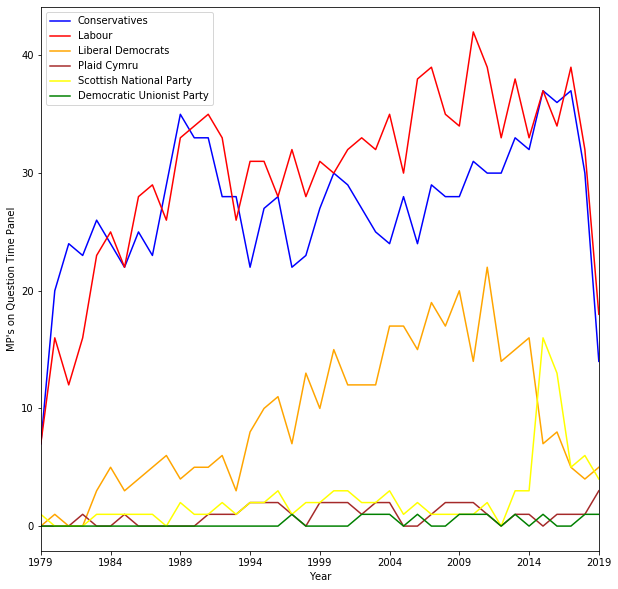

In [42]:
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.ylabel("MP's on Question Time Panel")
df_new.plot(kind='line',x='Year',y='Conservatives',color = 'blue',ax=ax)
df_new.plot(kind='line',x='Year',y='Labour',color = 'red',ax=ax)
df_new.plot(kind='line',x='Year',y='Liberal Democrats',color = 'orange',ax=ax)
df_new.plot(kind='line',x='Year',y='Plaid Cymru',color = 'brown',ax=ax)
df_new.plot(kind='line',x='Year',y='Scottish National Party',color = 'yellow',ax=ax)
df_new.plot(kind='line',x='Year',y='Democratic Unionist Party',color = 'green',ax=ax)

plt.show()